### Overview of the Dataset
The dataset contains aggregate individual statistics for 67 NBA seasons. It includes basic box-score attributes such as points, assists, rebounds etc. The data was originally scraped from basketball reference.

The dataset includes 24691 observations across 51 columns.

https://www.kaggle.com/drgilermo/nba-players-stats/data

In [12]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd")

### Read data in and get a feel for the variables, shape and data types

In [13]:
player_stats = pd.read_csv('Seasons_Stats.csv')

In [14]:
player_stats.head(5)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.000,Curly Armstrong,G-F,31.000,FTW,63.000,nan,nan,nan,...,0.705,nan,nan,nan,176.000,nan,nan,nan,217.000,458.000
1,1,1950.000,Cliff Barker,SG,29.000,INO,49.000,nan,nan,nan,...,0.708,nan,nan,nan,109.000,nan,nan,nan,99.000,279.000
2,2,1950.000,Leo Barnhorst,SF,25.000,CHS,67.000,nan,nan,nan,...,0.698,nan,nan,nan,140.000,nan,nan,nan,192.000,438.000
3,3,1950.000,Ed Bartels,F,24.000,TOT,15.000,nan,nan,nan,...,0.559,nan,nan,nan,20.000,nan,nan,nan,29.000,63.000
4,4,1950.000,Ed Bartels,F,24.000,DNN,13.000,nan,nan,nan,...,0.548,nan,nan,nan,20.000,nan,nan,nan,27.000,59.000


In [15]:
player_stats.drop(columns=['Unnamed: 0', 'Year'], inplace=True)

In [16]:
player_stats.describe()

,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,24616.000,24624.000,18233.000,24138.000,24101.000,24538.000,18839.000,24525.000,20792.000,20792.000,...,23766.000,20797.000,20797.000,24312.000,24624.000,20797.000,20797.000,19645.000,24624.000,24624.000
mean,26.664,50.837,23.593,1209.720,12.479,0.493,0.159,0.325,6.182,13.709,...,0.719,62.189,147.199,224.637,114.853,39.897,24.470,73.940,116.339,510.116
std,3.842,26.496,28.632,941.147,6.039,0.094,0.187,0.219,4.873,6.636,...,0.142,67.325,145.922,228.190,135.864,38.713,36.935,67.714,84.792,492.923
min,18.000,1.000,0.000,0.000,-90.600,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,24.000,27.000,0.000,340.000,9.800,0.458,0.005,0.208,2.600,8.800,...,0.657,12.000,33.000,51.000,19.000,9.000,3.000,18.000,39.000,106.000
50%,26.000,58.000,8.000,1053.000,12.700,0.506,0.064,0.296,5.400,12.700,...,0.743,38.000,106.000,159.000,68.000,29.000,11.000,55.000,109.000,364.000
75%,29.000,75.000,45.000,1971.000,15.600,0.544,0.288,0.400,9.000,18.100,...,0.808,91.000,212.000,322.000,160.000,60.000,29.000,112.000,182.000,778.000
max,44.000,88.000,83.000,3882.000,129.100,1.136,1.000,6.000,100.000,100.000,...,1.000,587.000,1111.000,2149.000,1164.000,301.000,456.000,464.000,386.000,4029.000


In [17]:
player_stats.shape

(24691, 51)

In [18]:
player_stats.dtypes

Player     object
Pos        object
Age       float64
Tm         object
G         float64
GS        float64
MP        float64
PER       float64
TS%       float64
3PAr      float64
FTr       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
blanl     float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
blank2    float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

### Determine presence of missing values and remove from columns of interest

In [19]:
#Create variable to find missing values across all columns

missing_values_count = player_stats.isnull().sum()
print(missing_values_count)

Player       67
Pos          67
Age          75
Tm           67
G            67
GS         6458
MP          553
PER         590
TS%         153
3PAr       5852
FTr         166
ORB%       3899
DRB%       3899
TRB%       3120
AST%       2136
STL%       3899
BLK%       3899
TOV%       5109
USG%       5051
blanl     24691
OWS         106
DWS         106
WS          106
WS/48       590
blank2    24691
OBPM       3894
DBPM       3894
BPM        3894
VORP       3894
FG           67
FGA          67
FG%         166
3P         5764
3PA        5764
3P%        9275
2P           67
2PA          67
2P%         195
eFG%        166
FT           67
FTA          67
FT%         925
ORB        3894
DRB        3894
TRB         379
AST          67
STL        3894
BLK        3894
TOV        5046
PF           67
PTS          67
dtype: int64


In [47]:
#Drop NaN's in the columns we care most about

player_stats = player_stats.dropna(subset=['PTS', 'FGA', 'FTA', 'AST', 'PF'])

### Exploratory Analysis

**Start with the variable, points (PTS)**

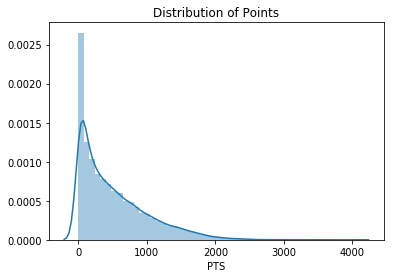

In [22]:
#First, look at Points

sns.distplot(player_stats['PTS'])
plt.title('Distribution of Points')
plt.show()

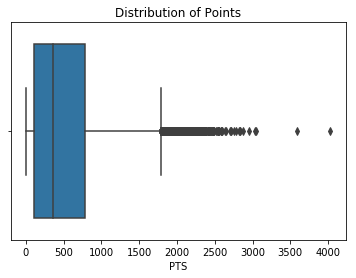

In [26]:
sns.boxplot(x=player_stats["PTS"])
plt.title('Distribution of Points')
plt.show()

In [35]:
player_stats['PTS'].describe()

count   24624.000
mean      510.116
std       492.923
min         0.000
25%       106.000
50%       364.000
75%       778.000
max      4029.000
Name: PTS, dtype: float64

**Next, look at Field Goals Attempted (FGA)**

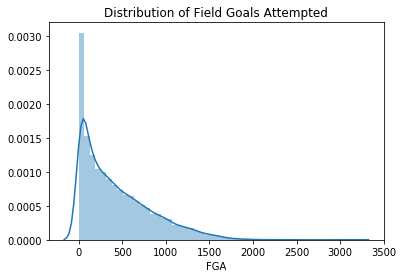

In [27]:
#Second, look at Field Goals Attempted

sns.distplot(player_stats['FGA'])
plt.title('Distribution of Field Goals Attempted')
plt.show()

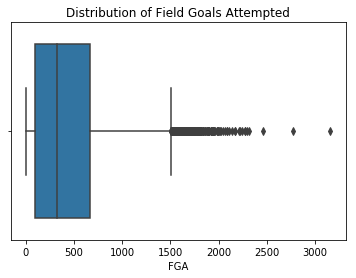

In [28]:
sns.boxplot(x=player_stats["FGA"])
plt.title('Distribution of Field Goals Attempted')
plt.show()

In [34]:
player_stats['FGA'].describe()

count   24624.000
mean      430.646
std       397.625
min         0.000
25%        99.000
50%       321.000
75%       661.000
max      3159.000
Name: FGA, dtype: float64

**Next, look at Free Throws Attempted (FTA)**

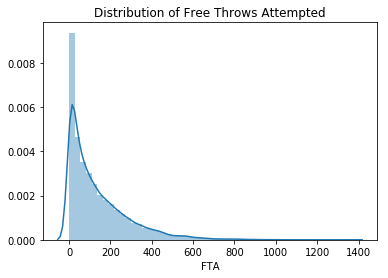

In [29]:
#Third, look at Free Throws Attempted

sns.distplot(player_stats['FTA'])
plt.title('Distribution of Free Throws Attempted')
plt.show()

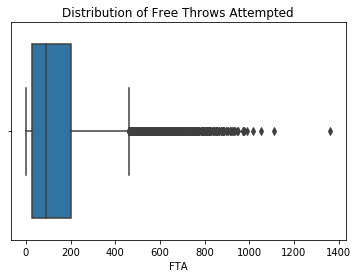

In [30]:
sns.boxplot(x=player_stats["FTA"])
plt.title('Distribution of Free Throws Attempted')
plt.show()

In [36]:
player_stats['FTA'].describe()

count   24624.000
mean      136.775
std       146.079
min         0.000
25%        27.000
50%        88.000
75%       201.000
max      1363.000
Name: FTA, dtype: float64

**Next, Assists**

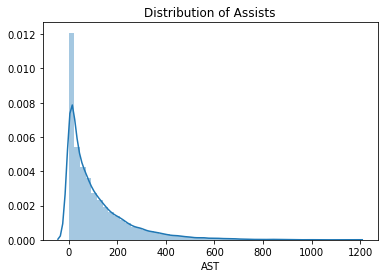

In [61]:
#Fourth, look at Assists

sns.distplot(player_stats['AST'])
plt.title('Distribution of Assists')
plt.show()

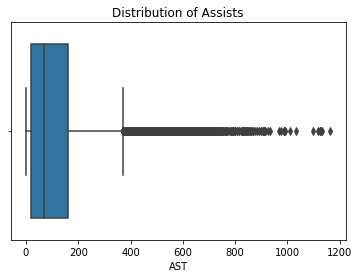

In [60]:
sns.boxplot(x=player_stats["AST"])
plt.title('Distribution of Assists')
plt.show()

In [59]:
player_stats['AST'].describe()

count   24624.000
mean      114.853
std       135.864
min         0.000
25%        19.000
50%        68.000
75%       160.000
max      1164.000
Name: AST, dtype: float64

**Finally, Personal Fouls**

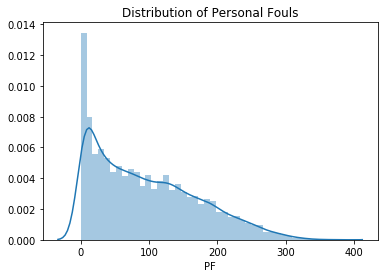

In [104]:
#Fifth, look at Personal Fouls

sns.distplot(player_stats['PF'])
plt.title('Distribution of Personal Fouls')
plt.show()

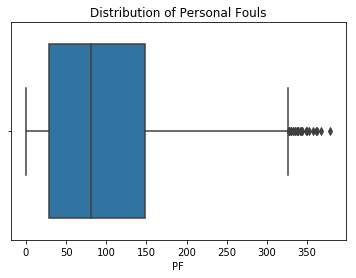

In [105]:
sns.boxplot(x=player_stats["PF"])
plt.title('Distribution of Personal Fouls')
plt.show()

In [106]:
player_stats['PF'].describe()

count   20040.000
mean       95.470
std        76.142
min         0.000
25%        29.000
50%        81.000
75%       148.000
max       379.000
Name: PF, dtype: float64

### Remove outliers/skewness based on the above

**Primarily looking at removing the top 5 to 10%, based on distributions**

In [63]:
#Starting with Points
player_stats['PTS'].quantile(0.95)

1518.0

In [64]:
player_stats = player_stats[player_stats['PTS'] < 1518]

In [65]:
#Next Field Goals Attempted
player_stats['FGA'].quantile(0.95)

1025.0

In [66]:
player_stats = player_stats[player_stats['FGA'] < 1025]

In [67]:
#Next Free Throws Attempted
player_stats['FTA'].quantile(0.95)

311.0

In [68]:
player_stats = player_stats[player_stats['FTA'] < 311]

In [69]:
#Finally Assists
player_stats['AST'].quantile(0.95)

306.0

In [70]:
player_stats = player_stats[player_stats['AST'] < 306]

### Define, run and validate multivariate regression model

**Model Equation:** Points (PTS) = Field Goals Attempted (FGA) + Assists (AST) + Personal Fouls (PF)

In [115]:
# Instantiate and fit our model.
regression = linear_model.LinearRegression()
Y = player_stats['PTS']
X = player_stats[['FGA', 'AST', 'PF']]
regression.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regression.coef_)
print('\nIntercept: \n', regression.intercept_)
print('\nR-squared:')
print(regression.score(X, Y))


Coefficients: 
 [ 1.13408418 -0.03941859  0.14299544]

Intercept: 
 -7.415568695323373

R-squared:
0.9731498322141118


In [116]:
# Use a ~ to represent an '=' from the functional form
linear_formula = 'PTS ~ FGA+AST+PF'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=player_stats).fit()

In [117]:
lm.pvalues

Intercept   0.000
FGA         0.000
AST         0.000
PF          0.000
dtype: float64

### Working through Multivariate Regression Assumptions

**Assumption One:** Linear Relationship with all variables

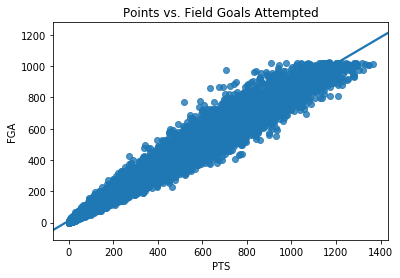

In [118]:
sns.regplot(x='PTS', y='FGA', data=player_stats)
plt.title('Points vs. Field Goals Attempted')
plt.show()

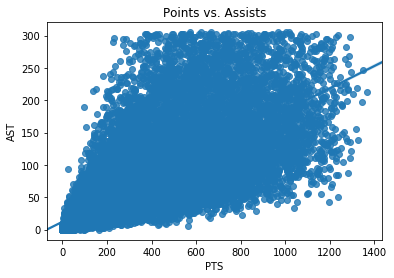

In [119]:
sns.regplot(x='PTS', y='AST', data=player_stats)
plt.title('Points vs. Assists')
plt.show()

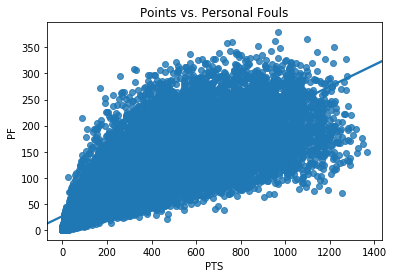

In [120]:
sns.regplot(x='PTS', y='PF', data=player_stats)
plt.title('Points vs. Personal Fouls')
plt.show()

**Assumption Two:** Multivariate Normality

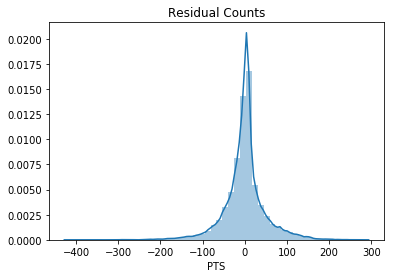

In [121]:
# Extract predicted values.
predicted = regression.predict(X).ravel()
actual = player_stats['PTS']

# Calculate the error, also called the residual.
residual = actual - predicted

sns.distplot(residual)
plt.title('Residual Counts')
plt.show()

**Assumption Three:** Homoscedasticity

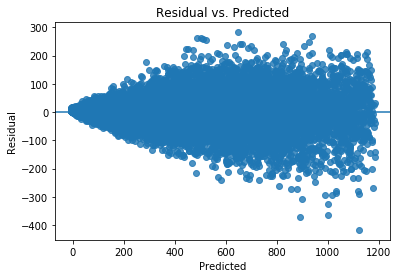

In [122]:
#Plotting residual vs. predicted

sns.regplot(x=predicted, y=residual, fit_reg=False)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

**Assumption Four:** Low Multicollinearity

In [123]:
correlation_matrix = X.corr()
display(correlation_matrix)

,FGA,AST,PF
FGA,1.000,0.747,0.813
AST,0.747,1.000,0.599
PF,0.813,0.599,1.000


In [125]:
from sklearn.model_selection import cross_val_score
cross_val_score(regression, X, Y, cv=5)

array([0.9262666 , 0.97658073, 0.9795706 , 0.97989828, 0.97737098])

### Now let's build a KNN Regression Model based off the same data

**First, unweighted**

In [126]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

**Second, weighted**

In [127]:
from sklearn import neighbors

# Build our model.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
knn_w.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='distance')

In [128]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.97 (+/- 0.04)
Weighted Accuracy: 0.97 (+/- 0.04)


**Takeaway:** In this example, both of our models (Multivariate vs. KNN) performed at about the same rate. Additionally, the weighted vs. unweighted versions of our KNN regression performed at the same rate as well. I think that due to the high concentration of values and correlation between variables, the weight did not make a difference.